# Hipótesis relativas a dos proporciones
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-de-2-proporciones
###### https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest


## Comparación de dos proporciones
### Comparación rapida y efectiva por valor P (comparado con alfa)
+ Usando stats models y obteniendo el resultado del valor p

Estadístico Z: 0.9354
Valor p: 0.3496
Valor Crítico (alfa): 96.0000


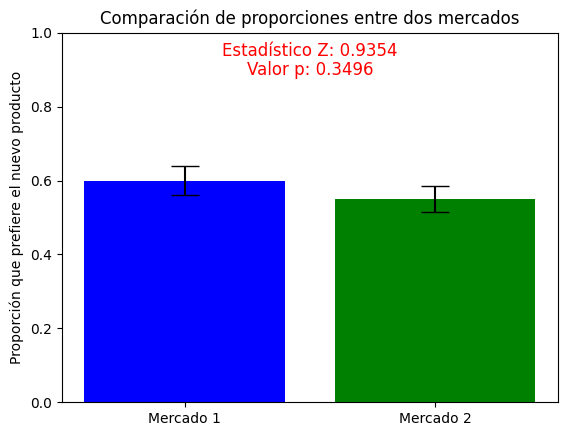

In [34]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Datos de las muestras
n1, n2 = 150, 200  # Tamaños de las muestras
x1, x2 = 90, 110   # Número de éxitos en cada muestra

# Proporciones observadas en las muestras
p1 = x1 / n1
p2 = x2 / n2

# Prueba de proporciones usando statsmodels
count = np.array([x1, x2])
nobs = np.array([n1, n2])
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

# Resultado de la prueba
print(f'Estadístico Z: {z_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Valor (una cola)
critical_value = binom.ppf(0.95, n1, p_combined)
print(f'Valor Crítico (alfa): {critical_value:.4f}')

# Visualización con matplotlib
labels = ['Mercado 1', 'Mercado 2']
proportions = [p1, p2]
errors = [np.sqrt(p1 * (1 - p1) / n1), np.sqrt(p2 * (1 - p2) / n2)]

fig, ax = plt.subplots()
ax.bar(labels, proportions, yerr=errors, capsize=10, color=['blue', 'green'])
ax.set_ylim(0, 1)
ax.set_ylabel('Proporción que prefiere el nuevo producto')
ax.set_title('Comparación de proporciones entre dos mercados')

# Mostrar el valor p en el gráfico
ax.text(0.5, 0.95, f'Estadístico Z: {z_stat:.4f}', ha='center', va='center', fontsize=12, color='red', transform=ax.transAxes)
ax.text(0.5, 0.90, f'Valor p: {p_value:.4f}', ha='center', va='center', fontsize=12, color='red', transform=ax.transAxes)

plt.show()


### Usando distribución binomial sin estadístico d prueba

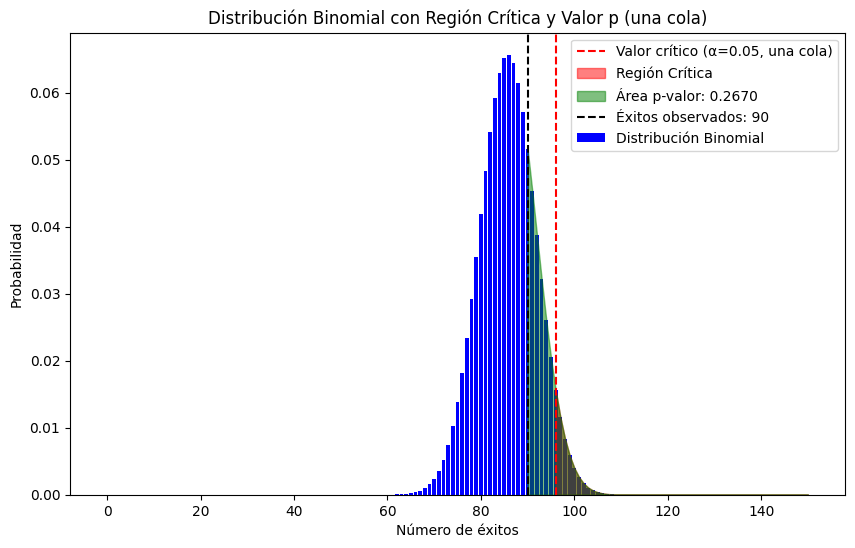

Éxitos observados: 90
Valor crítico (α=0.05): 96.00
Valor p (una cola): 0.2670


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Datos de las muestras
n1, n2 = 150, 200  # Tamaños de las muestras
x1, x2 = 90, 110   # Número de éxitos en cada muestra

# Proporciones observadas en las muestras
p1 = x1 / n1
p2 = x2 / n2

# Hipótesis nula: las proporciones son iguales, usamos la proporción combinada
p_combined = (x1 + x2) / (n1 + n2)

# Cálculo del estadístico de prueba binomial (diferencia en proporciones)
diff_observed = x1 - (p_combined * n1)

# Probabilidad de éxito bajo la hipótesis nula
p_value_binom = 1 - binom.cdf(x1 - 1, n1, p_combined)

# Gráfico de la distribución binomial
x_values = np.arange(0, n1 + 1)
y_values = binom.pmf(x_values, n1, p_combined)

plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='blue', label='Distribución Binomial')

# Región crítica (una cola, usando el valor crítico)
critical_value = binom.ppf(0.95, n1, p_combined)

plt.axvline(critical_value, color='red', linestyle='--', label='Valor crítico (α=0.05, una cola)')
plt.fill_between(x_values, y_values, where=(x_values >= critical_value), color='red', alpha=0.5, label='Región Crítica')

# Rellenar el área correspondiente al valor p
plt.fill_between(x_values, y_values, where=(x_values >= x1), color='green', alpha=0.5, label=f'Área p-valor: {p_value_binom:.4f}')

# Marcando el número de éxitos observados
plt.axvline(x1, color='black', linestyle='--', label=f'Éxitos observados: {x1}')

# Etiquetas y leyenda
plt.title('Distribución Binomial con Región Crítica y Valor p (una cola)')
plt.xlabel('Número de éxitos')
plt.ylabel('Probabilidad')
plt.legend()

plt.show()

# Resultados del test
print(f'Éxitos observados: {x1}')
print(f'Valor crítico (α=0.05): {critical_value:.2f}')
print(f'Valor p (una cola): {p_value_binom:.4f}')


### Usando distribucilón normal estandar
+ Menos preciso. Solo para revisar decision tomada con statsmodels en el primer caso

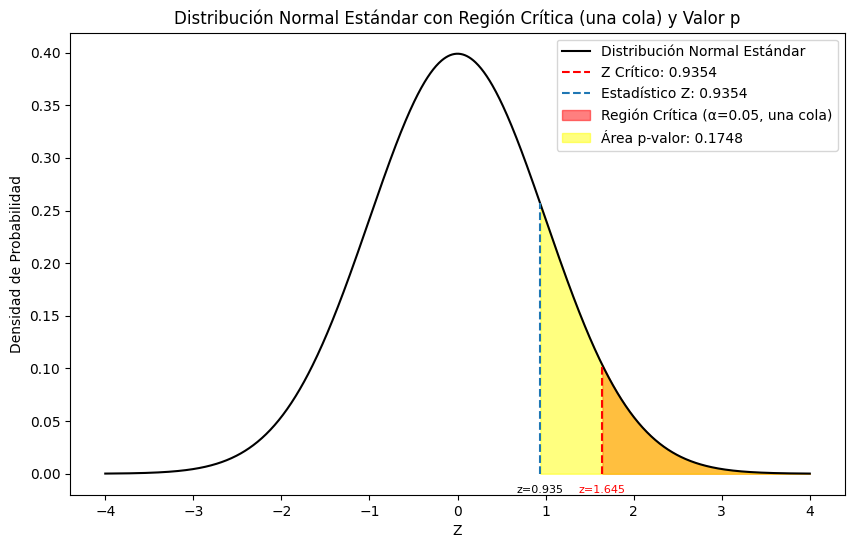

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de las muestras
n1, n2 = 150, 200  # Tamaños de las muestras
x1, x2 = 90, 110   # Número de éxitos en cada muestra

# Proporciones observadas en las muestras
p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada bajo la hipótesis nula
p_combined = (x1 + x2) / (n1 + n2)
std_error_combined = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

# Estadístico Z
z_stat = (p1 - p2) / std_error_combined

# Valor p (una cola)
p_value = 1 - norm.cdf(z_stat)

# Creación de valores x para la distribución normal estándar
x_values = np.linspace(-4, 4, 1000)
y_values = norm.pdf(x_values, 0, 1)

# Gráfico de la distribución normal estándar
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Distribución Normal Estándar', color='black')

# Marca el z crítico 
plt.plot([z_critical, z_critical], [0, norm.pdf(z_critical)], linestyle="dashed", color='red', label=f'Z Crítico: {z_stat:.4f}')
plt.text(x=z_critical, y=-0.02, s=f'z={z_critical:.3f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de z_critical sobre el eje x

# Marcando el estadístico Z en el gráfico
plt.plot([z_stat, z_stat], [0, norm.pdf(z_stat)], linestyle="dashed", label=f'Estadístico Z: {z_stat:.4f}')
plt.text(x=z_stat, y=-0.02, s=f'z={z_stat:.3f}', ha='center', va='bottom', fontsize=8)   # Añade valor de z_stat sobre el eje x

# Rellenar la región crítica (alfa = 0.05, 1 cola)
z_critical = norm.ppf(0.95)  # Usando 0.95 para una cola
plt.fill_between(x_values, y_values, where=(x_values >= z_critical), color='red', alpha=0.5, label='Región Crítica (α=0.05, una cola)')

# Rellenar el área correspondiente al valor p
plt.fill_between(x_values, y_values, where=(x_values >= z_stat), color='yellow', alpha=0.5, label=f'Área p-valor: {p_value:.4f}')



# Etiquetas y leyenda
plt.title('Distribución Normal Estándar con Región Crítica (una cola) y Valor p')
plt.xlabel('Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()


_______________________________________________________________________________________________________________________________________________________________________